In [140]:
import pandas as pd
import seaborn as sns
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import dates
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:

columns = 'date,payment_type,passenger_count,total_count,total_rev,tip_percent,avg_tip_percent,weekday,season,snow,rain,tavg'

In [3]:
columns = columns.strip().split(',')

In [4]:

path = '../data/TipByDayPaymentCount/' 
#filenames = []
#for i in range(7):
#    filenames.append(path + 'part-0000%s' %i)
    
#with open(path + '/combined', 'w') as out:
#    for fname in filenames:
#        with open(fname) as infile:
#            for line in infile:
#                key, values = line.strip().split('\t',1)
#                line = ','.join([key,values,'\n'])
#                out.write(line)



In [39]:
f = open(path + '/combined')
a = f.readlines()

In [40]:
df = pd.read_csv(path + '/combined', header = None, usecols = np.arange(12))

In [41]:
df.columns = columns

In [42]:
df.head(2)

,date,payment_type,passenger_count,total_count,total_rev,tip_percent,avg_tip_percent,weekday,season,snow,rain,tavg
0,2013-12-14,UNK,6,205,3202.85,0.15,14.81,7,fall,0,0,32
1,2013-03-08,CRD,2,26868,422851.37,0.16,15.66,1,spring,1,0,35


In [43]:
df['zero_tip'] = df.avg_tip_percent.apply(lambda num: 1 if num == 0 else 0)
pd.crosstab(df.payment_type,df.zero_tip)

zero_tip,0,1
payment_type,,
CRD,1649,6
CSH,50,1609
DIS,156,862
NOC,243,890
UNK,1261,4


In [44]:
df_clean = df.loc[df.payment_type.isin(['CRD','UNK'])]
df_clean = df_clean[df_clean.passenger_count != 208]

In [114]:
df_clean.total_count.sum()

62424055

In [113]:
df[df.passenger_count == 208]['total_count'].sum()

12

## Payment Type

In [46]:
df_clean.groupby('payment_type')['total_count'].sum() / df_clean.total_count.sum()

payment_type
CRD    0.99779
UNK    0.00221
Name: total_count, dtype: float64

In [47]:
df_clean.total_count.sum()

62424055

In [48]:
df_clean['total_tip_percent'] = df_clean.total_count * df_clean.avg_tip_percent
df_clean.groupby('payment_type')['total_tip_percent'].sum() / df_clean.groupby('payment_type')['total_count'].sum()

payment_type
CRD    15.760685
UNK    15.227019
dtype: float64

In [57]:
avg_tip = df_clean.total_tip_percent.sum() / df_clean.total_count.sum()

15.75950620269699

## Time of Year

In [49]:
df_clean.groupby('season')['total_tip_percent'].sum() / df_clean.groupby('season')['total_count'].sum()

season
fall      15.743499
spring    15.730145
summer    15.691513
winter    15.873512
dtype: float64

(15, 16)

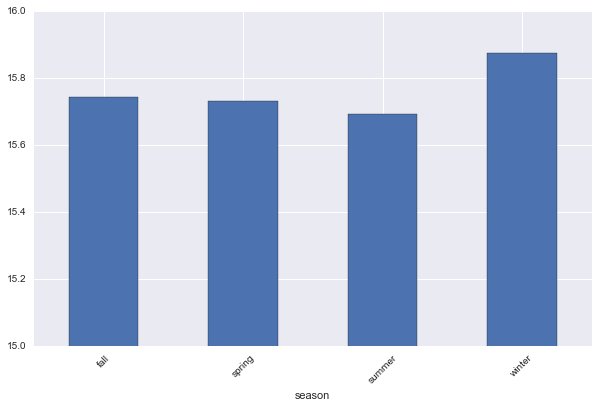

In [170]:
grouped = df_clean.groupby('season')['total_tip_percent'].sum() / df_clean.groupby('season')['total_count'].sum()
g = grouped.plot(x = 'season',kind = 'bar', figsize = [10,6], rot = 45)
g.set_ylim([15,16])

## Time of Week

In [51]:
df_clean.columns

Index([u'date', u'payment_type', u'passenger_count', u'total_count',
       u'total_rev', u'tip_percent', u'avg_tip_percent', u'weekday', u'season',
       u'snow', u'rain', u'tavg', u'zero_tip', u'total_tip_percent'],
      dtype='object')

In [52]:
df_clean.groupby('weekday')['total_tip_percent'].sum() / df_clean.groupby('weekday')['total_count'].sum()

weekday
1    15.752754
2    15.737619
3    15.765329
4    15.752034
5    15.762279
6    15.767978
7    15.775265
dtype: float64

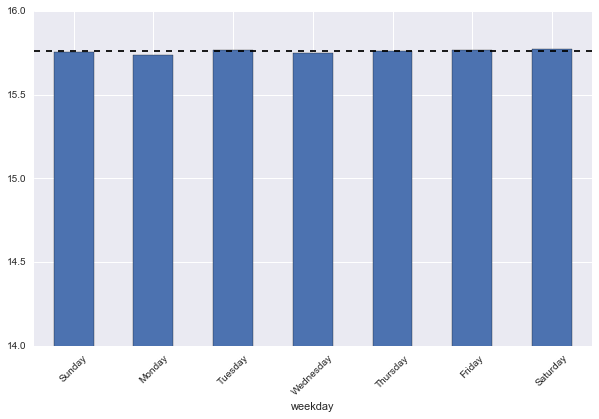

In [171]:
grouped = df_clean.groupby('weekday')['total_tip_percent'].sum() / df_clean.groupby('weekday')['total_count'].sum()
g = grouped.plot(x = 'weekday',kind = 'bar', figsize = [10,6],rot = 45)
g.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
g.set_ylim([14,16])
g.axhline(avg_tip,color='k', linestyle='--')

## Depending on Temperature

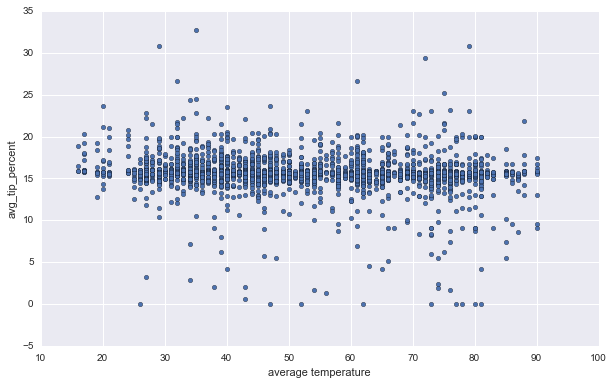

In [109]:
g = df_clean[['avg_tip_percent','tavg']].plot(x = 'tavg', y = 'avg_tip_percent',kind = 'scatter',figsize = [10,6])
g.set_xlabel('average temperature')

In [55]:
df_clean['tavg_bins'] = pd.cut(df_clean.tavg, bins = 10, precision = 0 ,retbins=True)[0]

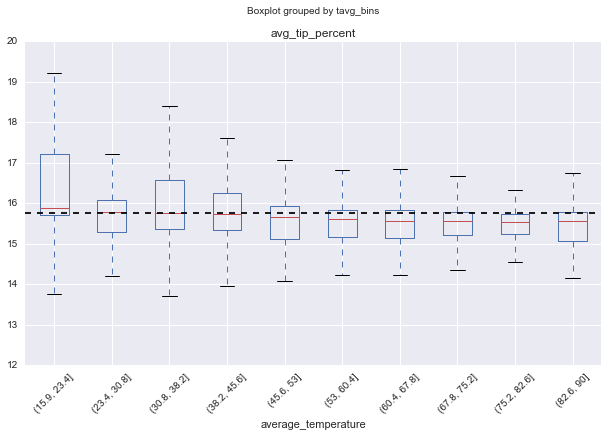

In [101]:
g = df_clean.boxplot(column = 'avg_tip_percent', by = 'tavg_bins',rot = 45, figsize = [10,6])
g.set_ylim([12,20])
g.set_xlabel('average_temperature')
g.axhline(avg_tip,color='k', linestyle='--')

## Rain or Snow

In [58]:
df_clean.groupby('snow')['total_tip_percent'].sum() / df_clean.groupby('snow')['total_count'].sum()

snow
0    15.751987
1    15.844545
dtype: float64

In [59]:
df_clean.groupby('rain')['total_tip_percent'].sum() / df_clean.groupby('rain')['total_count'].sum()

rain
0    15.767889
1    15.739057
dtype: float64

In [60]:
df_clean.groupby(['rain','snow'])['total_tip_percent'].sum() / df_clean.groupby(['rain','snow'])['total_count'].sum()

rain  snow
0     0       15.761242
      1       15.837220
1     0       15.729932
      1       15.868239
dtype: float64

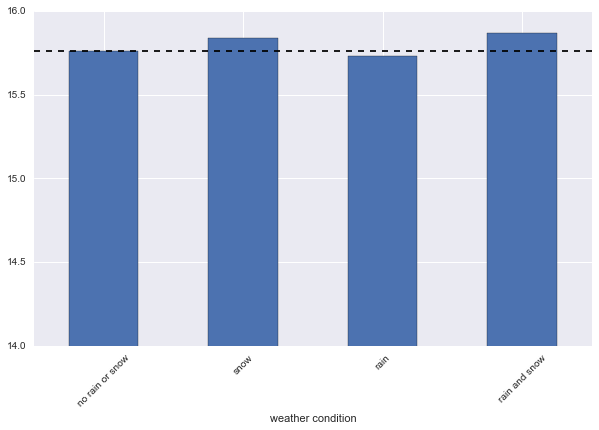

In [111]:
grouped = df_clean.groupby(['rain','snow'])['total_tip_percent'].sum() / df_clean.groupby(['rain','snow'])['total_count'].sum()
g = grouped.plot(x = ['rain','snow'],kind = 'bar',rot = 45, figsize = [10,6])
g.set_xticklabels(['no rain or snow','snow','rain','rain and snow'])
g.set_ylim([14,16])
g.set_xlabel('weather condition')
g.axhline(avg_tip,color='k', linestyle='--')

## number of passengers

In [173]:
grouped = df_clean.groupby('passenger_count')['total_tip_percent'].sum() / df_clean.groupby('passenger_count')['total_count'].sum()

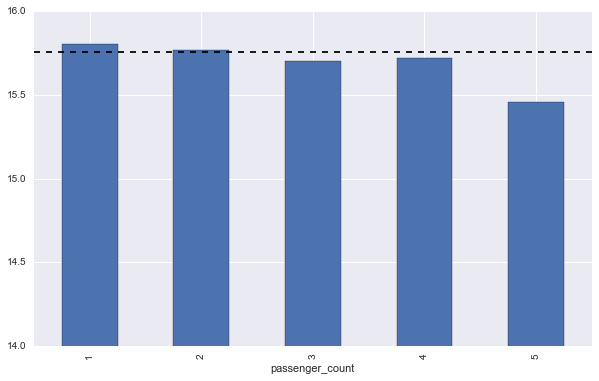

In [174]:
g = grouped[1:-4].plot(x = 'passenger_count', kind = 'bar', figsize = [10,6])
g.set_ylim([14,16])
g.axhline(avg_tip,color='k', linestyle='--')

## Holidays

In [88]:
subset = df_clean[df_clean.date.isin(['2014-01-01','2013-11-28','2013-12-25'])].copy()

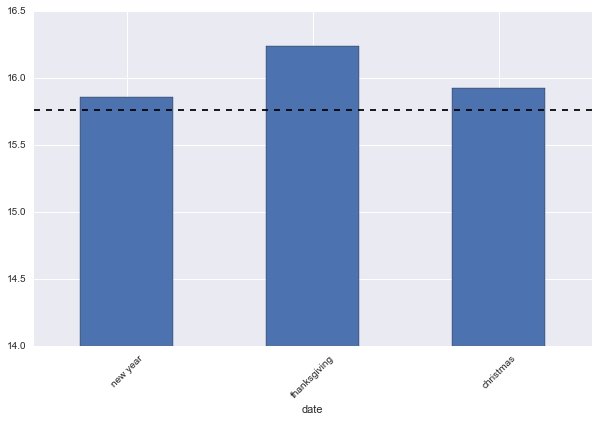

In [96]:
grouped = subset.groupby('date')['total_tip_percent'].sum()/subset.groupby('date')['total_count'].sum()
g = grouped.plot(x = 'date',kind = 'bar', rot = 45, figsize = [10,6])
g.set_xticklabels(['new year','thanksgiving','christmas'])
g.set_ylim([14,16.5])
g.axhline(avg_tip,color='k', linestyle='--')

In [146]:
df_clean['date'] = pd.to_datetime(df_clean['date'],format="%Y/%m/%d")
df_clean['xdate'] = df_clean['date'].astype(str)
df_clean = df_clean.sort_values(by = 'date')

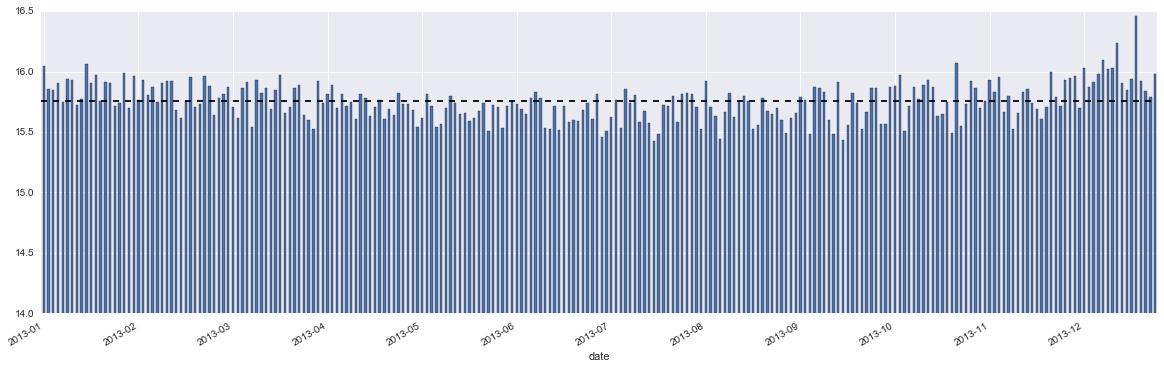

In [151]:
grouped = df_clean.groupby('date')['total_tip_percent'].sum()/df_clean.groupby('date')['total_count'].sum()
g = grouped.plot(x = 'date',kind = 'bar', rot = 45, figsize = [20,6])
g.set_ylim([14,16.5])
xdates = sorted(list(set(df_clean.date)))
g.set_xticks(np.arange(len(xdates))[::20])
g.set_xticklabels(xdates[::20])
ticklabels = [item.strftime('%Y-%m') for item in xdates[::20]]
g.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
g.axhline(avg_tip,color='k', linestyle='--')

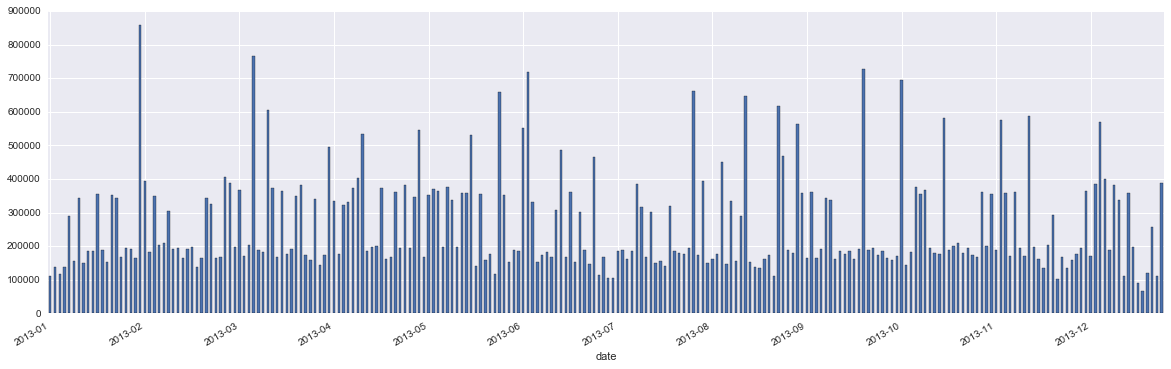

In [166]:
grouped = df_clean.groupby('date')['total_count'].sum()
g = grouped.plot(x = 'date',kind = 'bar', rot = 45, figsize = [20,6])
xdates = sorted(list(set(df_clean.date)))
g.set_xticks(np.arange(len(xdates))[::20])
g.set_xticklabels(xdates[::20])
ticklabels = [item.strftime('%Y-%m') for item in xdates[::20]]
g.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

(10000, 30000)

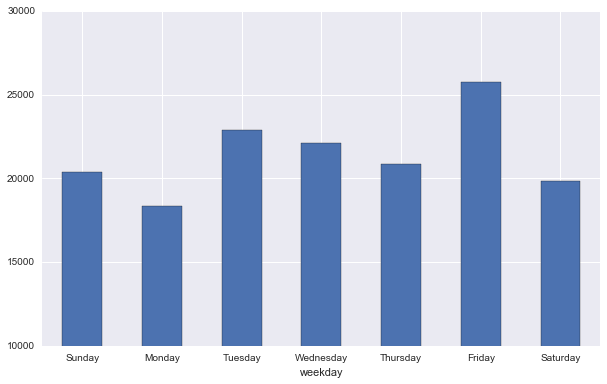

In [165]:
grouped = df_clean.groupby('weekday')['total_count'].mean()
g = grouped.plot(x = 'weekday',figsize = [10,6], kind = 'bar', rot = 0)
g.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
g.set_ylim([10000,30000])